In [7]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [8]:
train="/kaggle/input/gender-detection-and-classification-image-dataset/train"
valid="/kaggle/input/gender-detection-and-classification-image-dataset/test"
imagesize=(150,150)
batchsize=64
train_datagen = ImageDataGenerator(rescale=1./255,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   )
valid_datagen= ImageDataGenerator(rescale=1./255,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   )

train_data=train_datagen.flow_from_directory(train,target_size=imagesize,batch_size=batchsize,class_mode="binary")
valid_data=valid_datagen.flow_from_directory(valid,target_size=imagesize,batch_size=batchsize,class_mode="binary")


Found 220 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [9]:
Model=Sequential()

Model.add(Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)))
Model.add(MaxPooling2D(2,2))
Model.add(Conv2D(32,(3,3),activation="relu"))
Model.add(MaxPooling2D(2,2))
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPooling2D(2,2))
Model.add(Flatten())
Model.add(Dense(16,activation="relu"))
Model.add(Dense(32,activation="relu"))
Model.add(Dense(64,activation="relu"))
Model.add(Dense(1,activation="sigmoid"))


Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
history=Model.fit(train_data,epochs=10,validation_data=valid_data,batch_size=32)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 6s/step - accuracy: 0.4870 - loss: 0.6997 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5094 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4810 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6948
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4953 - loss: 0.6954 - val_accuracy: 0.4750 - val_loss: 0.6924
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5084 - loss: 0.6935 - val_accuracy: 0.5250 - val_loss: 0.6893
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5648 - loss: 0.6877 - val_accuracy: 0.5125 - val_loss: 0.6827
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5386 - loss: 0.6991 - val_accuracy: 0.5000 - val_loss: 0.6907
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5077 - loss: 0.6912 - val_accuracy: 0.5625 - val_loss: 0.6912
Epoch 9/

In [13]:
accuracy = Model.evaluate(valid_data)
print("Accuracy: %.2f%%" % (accuracy[1] * 100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5292 - loss: 0.6907
Accuracy: 51.25%


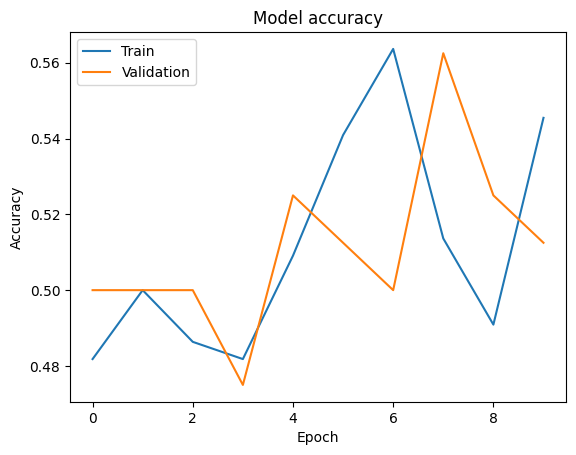

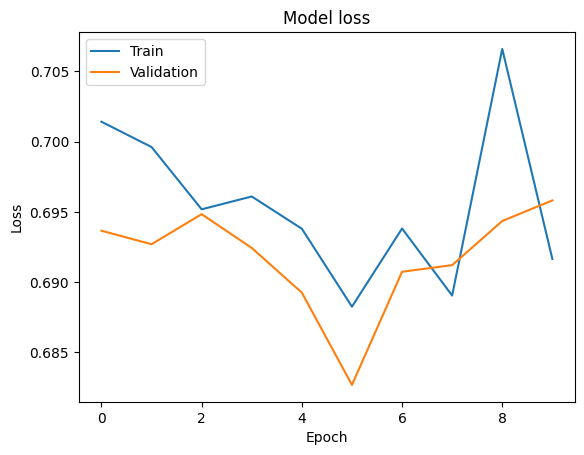

In [14]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
